VDP example with Zhang DMD

In [304]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

from odmd import OnlineDMD
from odmd import WindowDMD
import time

In [305]:
%run fDMD_functions.ipynb


In [306]:
#Van der Pol oscillator system
initial_condition = (1,0)
mu = 2.5
t_span=(0,20)
t_eval = np.linspace(t_span[0], t_span[1], 2000001)


def van_der_pol(t, state, mu):
    x, y = state
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]


sol = solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu,), t_eval=t_eval, vectorized=True) #u sol.y[0] i sol.y[1] su (x,y) koordinate točke za svaki trenutak

#print(sol.y[0].shape, sol.y[1].shape)
#print(sol.t.shape)

plt.figure(figsize=(8,6))
plt.plot(sol.y[0], sol.y[1], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

t_used=np.arange(0,2000001,1000)
del (t_eval)
vdp = sol.y[:,t_used]
#vremenski intervali 0.01, od trena 0 do 20
print(vdp.shape)



RuntimeError: latex was not able to process the following string:
b'\\u03bc=2.5, x0=1, y0=0'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.26 (MiKTeX 24.4) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(../095ddcecc96eb79ff7ccbe040dc8d412.tex
LaTeX2e <2024-11-01> patch level 1
L3 programming layer <2024-12-25>
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2024/06/29 v1.4n Standard LaTeX document class
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))

(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.s
ty)
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/firstaid\underscore-ltx
.sty) (C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty
)
(C:\Users\elawi\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file 095ddcecc96eb79ff7ccbe040dc8d412.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.18 {\sffamily μ
                  =2.5, x0=1, y0=0}
No pages of output.
Transcript written on 095ddcecc96eb79ff7ccbe040dc8d412.log.




<Figure size 576x432 with 1 Axes>

(2, 2001)


In [307]:
(n,m)=vdp.shape

In [308]:
#bez stackanja

q = 10 #toliko uzmem za pocetak
#evalsonlineDMD1 = np.empty((n, m), dtype=complex)
odmd = OnlineDMD(n, 1.0)
odmd.initialize(vdp[:, :q], vdp[:, 1:q+1])
start = time.time()
for k in range(q, m-1):
    odmd.update(vdp[:, k], vdp[:, k+1])
    #evalsonlineDMD1[:, k] = np.log(np.linalg.eigvals(odmd.A))/dt
end = time.time()
print("Online DMD, weighting = 1, time = " + str(end-start) + " secs")

Lambda, Z = odmd.computemodes()
print(Lambda)
print(Z)

Online DMD, weighting = 1, time = 0.06252288818359375 secs
[0.9998801+0.01013915j 0.9998801-0.01013915j]
[[-0.00475082-0.70216436j -0.00475082+0.70216436j]
 [ 0.71199905+0.j          0.71199905-0.j        ]]


In [309]:
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(vdp[:,:q], vdp[:,1:q+1])
start_nas = time.time()
for k in range(q, m-1):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.bmat([vdp[:,k],vdp[:,k+1]]).T, Q, L)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

print(Lambda_nas); print(Z)

#isti rezultati, ali nase puno sporije..

time:  0.8310694694519043 sec
[0.9998801+0.01013915j 0.9998801-0.01013915j]
[[-0.00475082-0.70216436j -0.00475082+0.70216436j]
 [ 0.71199905+0.j          0.71199905-0.j        ]]


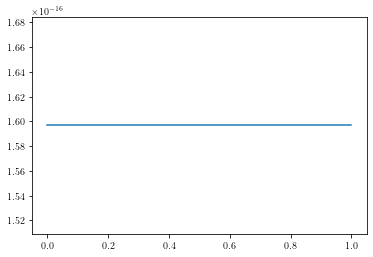

In [310]:
plt.plot(r) #provjeri je li se krivo racuna.. :::: DOBRO JE SADA

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


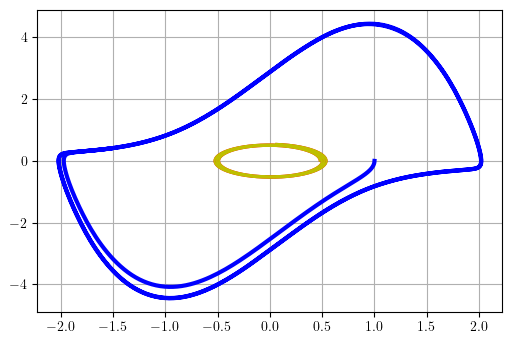

In [311]:
#kako izgleda rekonstrukcija s ovim modovima?
indices=np.array([0,1]); times=[i for i in range(m)]

reconstructed = DMD_reconstruction(vdp, Z_nas, indices, Lambda_nas, times)
reconstructed_zhang = DMD_reconstruction(vdp, Z, indices, Lambda, times)

plt.figure(dpi=100)
plt.plot(vdp[0,:], vdp[1,:], color="blue", lw=3)
plt.plot(reconstructed[0,:], reconstructed[1,:], color="red")
plt.plot(reconstructed_zhang[0,:], reconstructed_zhang[1,:], color="y")
plt.grid()

#jasno da je lose.. moramo stackat - isto za nas i za njihov

## WINDOW - jos nije stackano

kada jedan unaprijed gledam

In [312]:
w = 15 #toliko uzmem za pocetak
n = vdp.shape[0]; m = vdp.shape[1]

times_init=[i for i in range(w+1)]; times=[w]

wdmd = WindowDMD(n, w)
wdmd.initialize(vdp[:,:w], vdp[:,1:w+1]) # this is necessary for window DMD
start = time.time()
for k in range(w, m-1):
    wdmd.update(vdp[:, k], vdp[:, k+1])
    Lambda_w, Z_w = wdmd.computemodes()
    if k==w:
        reconstructed_njihovo_w = DMD_reconstruction(vdp[:,:w], Z_w, 'all', Lambda_w, times_init)
    else:
        reconstructed_njihovo_w = np.append(reconstructed_njihovo_w,DMD_reconstruction(vdp[:,k-w+1:k+1], Z_w, 'all', Lambda_w, times), axis=1)
end = time.time()
Lambda_w, Z_w = wdmd.computemodes()

print(Lambda_w,)

print("Window DMD, weighting = 1, time = " + str(end-start) + " secs")

Z_nas_w, Lambda_nas_w, r, Q, L = fGEDMDQ_multiple_trajectories(vdp[:,:q], vdp[:,1:q+1])
start_nas = time.time()
for k in range(w, m-1):
    _,_,_, Q, L = fDMD_discarding_snap(Q, L, 1)
    ### quick-fix za ortogonalnost
    """if((k-w)%50 == 0 and k>w):
        print("reortg")
        Q, R_q = np.linalg.qr(Q)
        R_q = R_q@L.T; L = R_q.T
    print(np.allclose(Q.T@Q, np.eye(Q.shape[1])))"""
    Z_nas_w, Lambda_nas_w, r, Q, L = fDMD_added_snap(np.bmat([vdp[:,k],vdp[:,k+1]]).T, Q, L)
    if k==w:
        reconstructed_nas_w = DMD_reconstruction(vdp[:,:w], Z_nas_w, 'all', Lambda_nas_w, times_init)
    else:
        reconstructed_nas_w = np.append(reconstructed_nas_w,DMD_reconstruction(vdp[:,k-w+1:k+1], Z_nas_w, 'all', Lambda_nas_w, times), axis=1)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

print(Lambda_nas_w); print(Z_w)

print(Lambda_nas_w-Lambda_w), print(Z_nas_w-Z_w)

print(Lambda_w); print(Z_w)


[0.99907448 1.00880018]
Window DMD, weighting = 1, time = 0.8769972324371338 secs
rho 0.4136538896780117
je li ortg novi stupac 2.5962963631595152e-17
rho 0.6299058571850398
je li ortg novi stupac 7.632783294297951e-17
rho 0.721806016526298
je li ortg novi stupac 4.955361418800576e-17
rho 0.7113646188353269
je li ortg novi stupac 2.807978972067913e-17
rho 0.6710277939588728
je li ortg novi stupac 8.283191067987946e-17
rho 0.6135812039517331
je li ortg novi stupac 9.776305758372018e-17
rho 0.5301489019367762
je li ortg novi stupac 6.93963925286957e-17
rho 0.39502216042822996
je li ortg novi stupac 8.845601481677439e-17
rho 0.14325993399537534
je li ortg novi stupac 9.309503074677274e-17
rho 0.11448357225669537
je li ortg novi stupac 3.179800655392251e-17
rho 0.4131049110050045
je li ortg novi stupac 3.98609107286759e-17
rho 0.4121930832665173
je li ortg novi stupac 5.721958498152797e-17
rho 0.41119556161067644
je li ortg novi stupac 7.664258822861523e-17
rho 0.4100920201357575
je li ort

Text(0.5, 1.0, 'our DMD')

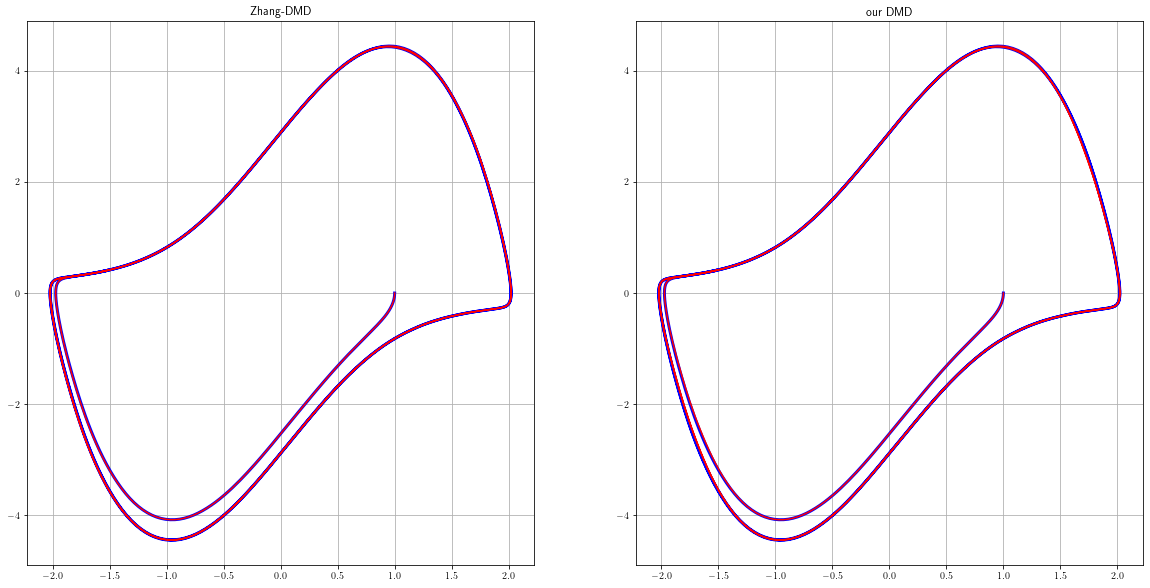

In [313]:
kraj=m
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(vdp[-2,:kraj], vdp[-1,:kraj], color="blue", lw=3)
plt.plot(reconstructed_njihovo_w[-2,:kraj], reconstructed_njihovo_w[-1,:kraj], color="red")
plt.grid()
plt.title("Zhang-DMD")

plt.subplot(1,2,2)
plt.plot(vdp[-2,:kraj], vdp[-1,:kraj], color="blue", lw=3)
plt.plot(reconstructed_nas_w[-2,:kraj], reconstructed_nas_w[-1,:kraj], color="red")
plt.grid()
plt.title("our DMD")

#savrsena rekonstrukcija u oba 
## nas nije vise bas savrsen - zasto


kada vise unaprijed gledam

#### ZA SLIKE

In [314]:
w = 30 #prozor!
unaprijed=30 #koliko unaprijed gledam

##  ZA SLIKE SAMO OVO MIJENJAM!!
######################################################################################################

n = vdp.shape[0]; m = vdp.shape[1]



times_init=[i for i in range(w+unaprijed)]; times=[unaprijed]

wdmd = WindowDMD(n, w)
wdmd.initialize(vdp[:,:w], vdp[:,1:w+1]) # this is necessary for window DMD
start = time.time()
for k in range(w, m-1):
    wdmd.update(vdp[:, k], vdp[:, k+1])
    Lambda_w, Z_w = wdmd.computemodes()
    if k==w:
        reconstructed_njihovo_w = DMD_reconstruction(vdp[:,:w], Z_w, 'all', Lambda_w, times_init)
    else:
        reconstructed_njihovo_w = np.append(reconstructed_njihovo_w,DMD_reconstruction(vdp[:,k-w+1:k+1], Z_w, 'all', Lambda_w, times), axis=1)
end = time.time()
Lambda_w, Z_w = wdmd.computemodes()

print(Lambda_w,)

print("Window DMD, weighting = 1, time = " + str(end-start) + " secs")
q=w
Z_nas_w, Lambda_nas_w, r, Q, L = fGEDMDQ_multiple_trajectories(vdp[:,:q], vdp[:,1:q+1])
start_nas = time.time()
for k in range(w, m-1):
    _,_,_, Q, L = fDMD_discarding_snap(Q, L, 1)

    ##### quick-fix za ortogonalnost
    """if((k-w)%50 == 0 and k>w):
        print("reortg")
        Q, R_q = np.linalg.qr(Q)
        R_q = R_q@L.T; L = R_q.T
    print(np.allclose(Q.T@Q, np.eye(Q.shape[1])))"""
    
    Z_nas_w, Lambda_nas_w, r, Q, L = fDMD_added_snap(np.bmat([vdp[:,k],vdp[:,k+1]]).T, Q, L)
    if k==w:
        reconstructed_nas_w = DMD_reconstruction(vdp[:,:w], Z_nas_w, 'all', Lambda_nas_w, times_init)
    else:
        reconstructed_nas_w = np.append(reconstructed_nas_w,DMD_reconstruction(vdp[:,k-w+1:k+1], Z_nas_w, 'all', Lambda_nas_w, times), axis=1)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

print(Lambda_nas_w); print(Z_w)

print(Lambda_w); print(Z_w)

print(Lambda_nas_w-Lambda_w), print(Z_nas_w-Z_w)

kraj=m
plt.figure(figsize=(14, 10))


CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
"""
plt.plot(vdp[-2,100:850], vdp[-1,100:850],lw=8, label=f"original", color=CB_color_cycle[0])
plt.plot(predicted_H[-2,:], predicted_H[-1,:], lw=3, label=f"Hemati-DMD prediction", color=CB_color_cycle[1])
#plt.plot(predicted[-2,:400], predicted[-1,:400], label=f"predicted - ours", color=CB_color_cycle[8],  linestyle='dashed')
plt.plot(predicted_thresh[-2,:], predicted_thresh[-1,:], label=f"our prediction", lw=3, color = CB_color_cycle[3], linestyle='dashed')

    
"""

kraj=m-700
plt.rcParams['text.usetex']=True
plt.plot(vdp[-2,:kraj], vdp[-1,:kraj], color=CB_color_cycle[0], lw=8, label=f"original")
plt.plot(reconstructed_njihovo_w[-2,:kraj], reconstructed_njihovo_w[-1,:kraj], color=CB_color_cycle[1], lw=3, label=f"Zhang-DMD")
plt.plot(reconstructed_nas_w[-2,:kraj], reconstructed_nas_w[-1,:kraj], color=CB_color_cycle[3], linestyle = 'dashed', lw=3, label=f"Our DMD")
plt.grid()
plt.legend(loc='upper right')
plt.title('$\mu$ = {}, predicting {} ahead'.format(mu, unaprijed))

#za 5 opet super u oba slucaja, i za 10, za 20 malo curi ali i dalje dobro


[0.99897661 1.00926324]
Window DMD, weighting = 1, time = 0.8721871376037598 secs
rho 0.8254505280429304
je li ortg novi stupac 8.348328566995498e-17
rho 0.8161537983618333
je li ortg novi stupac 6.727507242144006e-17
rho 0.8133944857125073
je li ortg novi stupac 6.245004513516506e-17
rho 0.8223067669637547
je li ortg novi stupac 4.220764384040162e-17
rho 0.8418400019817358
je li ortg novi stupac 4.6027415078689346e-17
rho 0.8612468772788932
je li ortg novi stupac 7.076311083754595e-17
rho 0.8702626573182786
je li ortg novi stupac 3.345813473843216e-17
rho 0.8666152672844383
je li ortg novi stupac 4.291468873614597e-17
rho 0.8515450672517199
je li ortg novi stupac 2.8988573637139114e-17
rho 0.8242332277881093
je li ortg novi stupac 4.9934661027263864e-17
rho 0.777343829819562
je li ortg novi stupac 4.473434455583162e-17
rho 0.7363660075889197
je li ortg novi stupac 9.450661414470315e-17
rho 0.732949776136826
je li ortg novi stupac 4.918789985999062e-17
rho 0.7292746245702789
je li ortg

KeyboardInterrupt: 

# STACKED

In [289]:
#pazi da ne runas vise od jednom..

#num_stack = 30
#num_stack=60
#num_stack=70 
num_stack = 5
m=vdp.shape[1]
vdp_end=vdp[:,-num_stack:]
vdp = vdp[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    added=np.hstack((vdp[:2,i:], vdp_end[:2,:i]))
    vdp=np.vstack((vdp,added))

(n, m)=vdp.shape
n,m

(10, 1997)

In [290]:
q = 30 #toliko uzmem za pocetak
kraj=m
odmd1 = OnlineDMD(n, 1.0)
odmd1.initialize(vdp[:, :q], vdp[:, 1:q+1]) #vec ako ovo rekonstruiram i plotam problemi.. zasto?
start = time.time()
for k in range(q, kraj-1):
    odmd1.update(vdp[:, k], vdp[:, k+1])
    #evalsonlineDMD1[:, k] = np.log(np.linalg.eigvals(odmd.A))/dt
end = time.time()
print("Online DMD, weighting = 1, time = " + str(end-start) + " secs")

Lambda, Z = odmd1.computemodes()
print(Lambda)
print(Z)

Online DMD, weighting = 1, time = 0.0738682746887207 secs
[-0.75650313+0.j          0.00558428+0.75424331j  0.00558428-0.75424331j
 -0.03997468+0.j          0.79900924+0.j          0.89748802+0.j
  0.97762764+0.06729322j  0.97762764-0.06729322j  0.99629235+0.00909941j
  0.99629235-0.00909941j]
[[ 6.19377026e-01+0.j          6.08816023e-01+0.j
   6.08816023e-01-0.j         -5.62348644e-02+0.j
   1.70205335e-02+0.j          4.97653450e-02+0.j
   1.82097124e-02+0.06164448j  1.82097124e-02-0.06164448j
  -3.21032942e-01+0.j         -3.21032942e-01-0.j        ]
 [ 2.68413571e-01+0.j          2.95974538e-01+0.01211754j
   2.95974538e-01-0.01211754j  9.97616995e-01+0.j
   6.35759688e-01+0.j         -5.40210912e-01+0.j
  -4.60866619e-01+0.j         -4.60866619e-01-0.j
   1.17991822e-01-0.29319752j  1.17991822e-01+0.29319752j]
 [-4.68563543e-01+0.j          3.39822208e-03+0.45919665j
   3.39822208e-03-0.45919665j  2.24810988e-03+0.j
   1.35995385e-02+0.j          4.46638010e-02+0.j
   1.36540628

In [258]:
Z.shape

(20, 20)

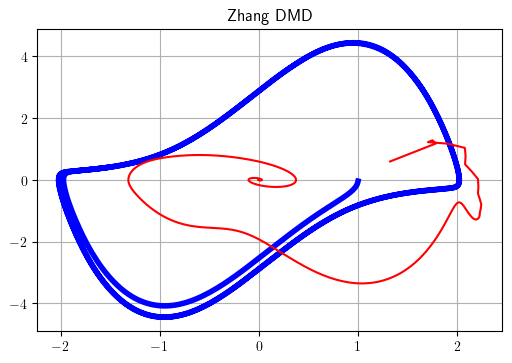

In [291]:
times=[i for i in range(m+100)]
reconstructed_zhang = DMD_reconstruction(vdp[:,:kraj], Z, 'all', Lambda, times) #ovdje rekonstruiram sve, to je bezveze
plt.figure(dpi=100)
plt.plot(vdp[-2,:kraj], vdp[-1,:kraj], color="b", lw=4)
plt.plot(reconstructed_zhang[-2,:kraj], reconstructed_zhang[-1,:kraj], color="r")
plt.grid()
plt.title('Zhang DMD')
plt.show()

In [222]:
#q=300 #moram imati vise od 240 elemenata za sad
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(vdp[:,:q], vdp[:,1:q+1], tol=1e-6)
start_nas = time.time()
for k in range(q, kraj-1):
    _,_,_, Q, L = fDMD_discarding_snap(Q, L, 1)
    #quick-fix za reortg
    """if((k-w)%200 == 0 and k>w):
        print("reortg")
        Q, R_q = np.linalg.qr(Q)
        R_q = R_q@L.T; L = R_q.T"""
    print(np.allclose(Q.T@Q, np.eye(Q.shape[1])))

    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.bmat([vdp[:,k],vdp[:,k+1]]).T, Q, L, tol=1e-6)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

print(Lambda_nas); print(Z_nas)


rho 0.3530545926752728
je li ortg novi stupac 1.0515179360274402e-16
True
rho 0.1404686549012013
je li ortg novi stupac 1.2527467006216444e-16
True
rho 0.08568412802972832
je li ortg novi stupac 1.4040497669528712e-16
True
rho 0.05902304470396658
je li ortg novi stupac 1.0190589189439163e-16
True
rho 0.00947386173944693
je li ortg novi stupac 9.578986018120931e-17
True
rho 0.016769445591110564
je li ortg novi stupac 1.129630446429822e-16
True
rho 7.624948308350394e-06
je li ortg novi stupac 1.3326216422876646e-16
True
rho 1.349351429134739e-09
je li ortg novi stupac 1.0207583519715713e-16
True
rho 2.4432437158027877e-08
je li ortg novi stupac 1.0046628837824967e-16
True
rho 1.9918943415432634e-07
je li ortg novi stupac 1.0188597771265174e-16
True
rho 7.779105359852058e-06
je li ortg novi stupac 1.6029490761629717e-16
True
rho 0.0001645938839298989
je li ortg novi stupac 8.597854901438047e-17
True
rho 0.06972684057962379
je li ortg novi stupac 1.201097397232624e-16
True
rho 0.0983708245

In [223]:
Z_nas.shape #104x106 - zasto.. 
        ##ne znam otkad je ova prije napomena, sad je 120x120 - valjda popravljeno nesto

(20, 20)

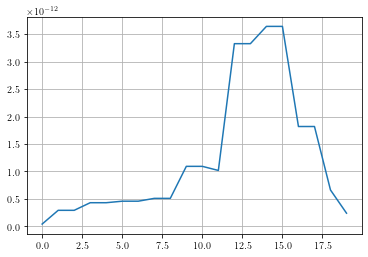

In [224]:
plt.plot(r) #uspjesno smanjeno (bilo je veceg reda kad sam ranije racunala..)
plt.grid()

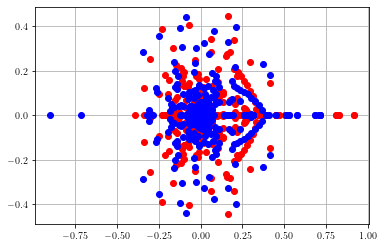

In [225]:
plt.plot(np.real(Z), np.imag(Z), 'o', color="r")
plt.plot(np.real(Z_nas), np.imag(Z_nas), 'o', color="b")
plt.grid()
plt.show()

In [ ]:
kraj=m-1000

indices_nas=np.array([i for i in range (Z_nas.shape[1])]); times=[i for i in range(m+100)]
#indices_nas = np.where(r<np.mean(r))[0] #ako s ovime imam 35 indeksa umjesto 59 i slicni rezultat..
print(indices_nas.shape)
reconstructed_nas = DMD_reconstruction(vdp[:,:kraj], Z_nas, indices_nas, Lambda_nas, times)

plt.figure(figsize=(12, 10))

plt.subplot(3,1,1)
plt.plot(vdp[-2,:kraj], vdp[-1,:kraj], color="blue", lw=3)
plt.plot(reconstructed_zhang[-2,:kraj], reconstructed_zhang[-1,:kraj], color="red")
plt.grid()
plt.title("30 stacked \n\n Zhang DMD - reconstruction")

plt.subplot(3,1,2)
plt.plot(vdp[-2,:kraj], vdp[-1,:kraj], color="blue", lw=3)
plt.plot(reconstructed_nas[-2,:kraj], reconstructed_nas[-1,:kraj], color="red")
plt.grid()
plt.title("All indices - our reconstruction")


indices_nas = np.where(r<1e-13)[0] #ako s ovime imam 35 indeksa umjesto 59 i slicni rezultat..
print(indices_nas.shape)
reconstructed_nas_dio = DMD_reconstruction(vdp[:,:kraj], Z_nas, indices_nas, Lambda_nas, times)

plt.subplot(3,1,3)
plt.plot(vdp[-2,:kraj], vdp[-1,:kraj], color="blue", lw=3)
plt.plot(reconstructed_nas_dio[-2,:kraj], reconstructed_nas_dio[-1,:kraj], color="red")
plt.grid()
plt.title("Some indices - our reconstruction")

plt.show()

#5e-15 ok threshold, 4e-15 premali..


(20,)


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in matmul
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in matmul
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


ValueError: array must not contain infs or NaNs

rho 0.7508617616401017
je li ortg novi stupac 8.111165651267544e-17
[0.29169434+0.5477213j  0.29169434-0.5477213j  0.03409207+0.j
 0.72840635+0.j         0.97507305+0.12933472j 0.97507305-0.12933472j
 1.00024731+0.01031266j 1.00024731-0.01031266j 1.03353987+0.01921908j
 1.03353987-0.01921908j]
rho 0.45539919037150034
je li ortg novi stupac 2.165432678977008e-16
[0.29150287+0.54778318j 0.29150287-0.54778318j 0.03348989+0.j
 0.73010495+0.j         0.97509962+0.12951212j 0.97509962-0.12951212j
 1.00035997+0.0103457j  1.00035997-0.0103457j  1.03296438+0.01926898j
 1.03296438-0.01926898j]
rho 0.22115648122714604
je li ortg novi stupac 8.210209988395745e-17
[0.29142516+0.54763661j 0.29142516-0.54763661j 0.03267349+0.j
 0.73181303+0.j         0.97526323+0.12976257j 0.97526323-0.12976257j
 1.00052354+0.01039528j 1.00052354-0.01039528j 1.03212898+0.01930324j
 1.03212898-0.01930324j]
rho 0.11759211116980554
je li ortg novi stupac 7.68716925880891e-17
[0.29151032+0.54725231j 0.29151032-0.54725231

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=8.39692e-40): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=4.64054e-88): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=2.94209e-99): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.02161e-17): result may not be accurate.


[0.10808411+0.42257783j 0.10808411-0.42257783j 0.33464212+0.24744674j
 0.33464212-0.24744674j 0.83222839+0.20469066j 0.83222839-0.20469066j
 1.10680766+0.j         1.03965237+0.j         0.99895728+0.00938568j
 0.99895728-0.00938568j]
rho 0.920792506365453
je li ortg novi stupac 5.070187155920015e-17
[0.13567574+0.41161089j 0.13567574-0.41161089j 0.33307159+0.18886637j
 0.33307159-0.18886637j 0.8014735 +0.20823717j 0.8014735 -0.20823717j
 1.11622479+0.j         1.03863405+0.j         0.99872015+0.009306j
 0.99872015-0.009306j  ]
rho 0.9195554079112666
je li ortg novi stupac 6.000641691524339e-17
[0.14616526+0.42559053j 0.14616526-0.42559053j 0.2448668 +0.j
 0.45593337+0.j         0.77211894+0.23434036j 0.77211894-0.23434036j
 1.12218231+0.j         1.03799305+0.j         0.99847542+0.00924938j
 0.99847542-0.00924938j]
rho 0.9121631295493641
je li ortg novi stupac 6.392086751708063e-17
[0.14591319+0.44161633j 0.14591319-0.44161633j 0.15190695+0.j
 0.54797352+0.j         0.77632505+0.274

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=3.71878e-40): result may not be accurate.


[0.18371507+0.49456029j 0.18371507-0.49456029j 0.34210207+0.j
 0.69684245+0.18413991j 0.69684245-0.18413991j 0.91683024+0.13126283j
 0.91683024-0.13126283j 0.9491443 +0.j         0.99895218+0.j
 1.00918   +0.j        ]
rho 0.6933958697741226
je li ortg novi stupac 6.735824687719779e-17
[0.18588677+0.49183683j 0.18588677-0.49183683j 0.44652928+0.16830253j
 0.44652928-0.16830253j 0.90343071+0.15437138j 0.90343071-0.15437138j
 0.85747781+0.j         0.95345451+0.j         0.99893663+0.j
 1.00931334+0.j        ]
rho 0.668447323973192
je li ortg novi stupac 1.0353225313687231e-16
[0.19079888+0.4841199j  0.19079888-0.4841199j  0.33005119+0.32217319j
 0.33005119-0.32217319j 0.92742845+0.16754281j 0.92742845-0.16754281j
 1.00962839+0.j         0.99889156+0.j         0.97193092+0.j
 0.93118903+0.j        ]
rho 0.6223886555696289
je li ortg novi stupac 1.0192086479224828e-16
[0.19247255+0.48236328j 0.19247255-0.48236328j 0.31467906+0.3430728j
 0.31467906-0.3430728j  0.92890197+0.16971503j 0.9289

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=7.65968e-113): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.19498e-38): result may not be accurate.


[-0.14043238+0.j          0.24608406+0.38615077j  0.24608406-0.38615077j
  0.56026415+0.40730903j  0.56026415-0.40730903j  1.00711806+0.12384099j
  1.00711806-0.12384099j  1.02624982+0.j          1.00464244+0.j
  0.99947864+0.j        ]
rho 0.9242975713397819
je li ortg novi stupac 6.604229221744015e-17
[-0.1332796 +0.j          0.24268923+0.39124017j  0.24268923-0.39124017j
  0.57188694+0.38760645j  0.57188694-0.38760645j  1.00215706+0.12354846j
  1.00215706-0.12354846j  1.02534247+0.j          1.00439065+0.j
  0.99951414+0.j        ]
rho 0.9343436856135843
je li ortg novi stupac 4.9373000364179077e-17
[-0.10819265+0.j          0.24022337+0.39604606j  0.24022337-0.39604606j
  0.57348444+0.35403555j  0.57348444-0.35403555j  0.99726082+0.12385191j
  0.99726082-0.12385191j  1.02437067+0.j          0.9995719 +0.j
  1.00403795+0.j        ]
rho 0.916533132828731
je li ortg novi stupac 6.30241707967855e-17
[-0.07562239+0.j          0.23846686+0.40050736j  0.23846686-0.40050736j
  0.56848203+

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=9.90414e-32): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=2.10297e-33): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.93255e-36): result may not be accurate.


rho 0.8399440428641354
je li ortg novi stupac 1.0426978745892123e-16
[-0.16027092+0.j          0.14582515+0.42840932j  0.14582515-0.42840932j
  0.72028314+0.23909947j  0.72028314-0.23909947j  0.97382781+0.1278688j
  0.97382781-0.1278688j   1.04023217+0.j          1.00989513+0.j
  0.99883743+0.j        ]
rho 0.7858174716538445
je li ortg novi stupac 7.921683057201118e-17
[-0.16007599+0.j          0.14572333+0.42819502j  0.14572333-0.42819502j
  0.72418708+0.23300188j  0.72418708-0.23300188j  0.97407117+0.12941258j
  0.97407117-0.12941258j  1.04035315+0.j          1.00995843+0.j
  0.99882862+0.j        ]
rho 0.8658675239564957
je li ortg novi stupac 7.419961957501985e-17
[-0.1598086 +0.j          0.14548268+0.42842023j  0.14548268-0.42842023j
  0.72780206+0.22629462j  0.72780206-0.22629462j  0.97451197+0.13089764j
  0.97451197-0.13089764j  1.04048069+0.j          1.01002985+0.j
  0.99881848+0.j        ]
rho 0.8713075807569285
je li ortg novi stupac 6.871415143600898e-17
[-0.1595708 +0.j 

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=6.94827e-137): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=4.72113e-59): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=3.88632e-51): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.01718e-47): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.6576e-17): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=4.26918e-17): result may not be ac

[0.26370495+0.50118466j 0.26370495-0.50118466j 0.04479717+0.j
 0.16733484+0.j         0.93595846+0.2833431j  0.93595846-0.2833431j
 1.16436796+0.j         1.04583111+0.j         1.01367855+0.j
 0.99832438+0.j        ]
rho 0.9189336451823655
je li ortg novi stupac 8.568565761400465e-17
[ 0.29534843+0.49355784j  0.29534843-0.49355784j -0.01234575+0.j
  0.1778423 +0.j          0.94360122+0.27563978j  0.94360122-0.27563978j
  1.15662376+0.j          1.04683608+0.j          1.01400752+0.j
  0.99829474+0.j        ]
rho 0.9321611496933379
je li ortg novi stupac 4.484260709675728e-17
[ 0.3172928 +0.48275183j  0.3172928 -0.48275183j -0.05435572+0.j
  0.19912862+0.j          0.94677219+0.2684807j   0.94677219-0.2684807j
  0.9982401 +0.j          1.01458334+0.j          1.04859805+0.j
  1.14620516+0.j        ]
rho 0.934916216740651
je li ortg novi stupac 4.023208242499716e-17
[-0.08197095+0.j          0.33026065+0.4691169j   0.33026065-0.4691169j
  0.22710237+0.j          0.94677354+0.26266952j  

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=6.43424e-18): result may not be accurate.



rho 0.9336967254019429
je li ortg novi stupac 4.428869662227158e-17
[0.2224687 +0.64170277j 0.2224687 -0.64170277j 0.41072769+0.27578711j
 0.41072769-0.27578711j 0.93289293+0.38121898j 0.93289293-0.38121898j
 1.07597372+0.06803611j 1.07597372-0.06803611j 1.02457304+0.j
 0.99716638+0.j        ]
rho 0.9266961809830947
je li ortg novi stupac 5.860774659974268e-17
[0.22209568+0.6357537j  0.22209568-0.6357537j  0.4340484 +0.08463322j
 0.4340484 -0.08463322j 0.92615952+0.37845212j 0.92615952-0.37845212j
 1.08072007+0.08044615j 1.08072007-0.08044615j 1.02574773+0.j
 0.99697103+0.j        ]
rho 0.9429960399985965
je li ortg novi stupac 6.945607627249117e-17
[0.21989844+0.63452865j 0.21989844-0.63452865j 0.26331186+0.j
 0.92269756+0.37493718j 0.92269756-0.37493718j 0.62471581+0.j
 1.0856422 +0.08726949j 1.0856422 -0.08726949j 1.0263674 +0.j
 0.99685249+0.j        ]
rho 0.9368435510760419
je li ortg novi stupac 7.034525612128772e-17
[0.22002731+0.63210433j 0.22002731-0.63210433j 0.22677859+0.j


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=2.01541e-70): result may not be accurate.


[-0.08054614+0.j          0.28047484+0.60131444j  0.28047484-0.60131444j
  0.9190283 +0.32519486j  0.9190283 -0.32519486j  0.83689585+0.j
  1.00498883+0.01996331j  1.00498883-0.01996331j  1.00553601+0.08942262j
  1.00553601-0.08942262j]
rho 0.9483238989790431
je li ortg novi stupac 4.7486330115796095e-17
[-0.08047699+0.j          0.28190668+0.60006515j  0.28190668-0.60006515j
  0.91877746+0.32544054j  0.91877746-0.32544054j  0.83139868+0.j
  1.00505175+0.01997894j  1.00505175-0.01997894j  1.0059878 +0.08945083j
  1.0059878 -0.08945083j]
rho 0.9471510412935129
je li ortg novi stupac 4.680615174740955e-17
[-0.08043841+0.j          0.28421088+0.59833221j  0.28421088-0.59833221j
  0.91872953+0.32585096j  0.91872953-0.32585096j  0.8244851 +0.j
  1.00510945+0.0199225j   1.00510945-0.0199225j   1.00662712+0.08934963j
  1.00662712-0.08934963j]
rho 0.9451822318464271
je li ortg novi stupac 3.9239169960855975e-17
[-0.0807094 +0.j          0.28813189+0.59554496j  0.28813189-0.59554496j
  0.919187

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.56452e-62): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=2.8238e-79): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=2.88015e-23): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.17696e-20): result may not be accurate.


rho 0.8583401584157362
je li ortg novi stupac 9.994891658341077e-17
[0.30093643+0.54897223j 0.30093643-0.54897223j 0.33314303+0.46651468j
 0.33314303-0.46651468j 0.96166778+0.1703697j  0.96166778-0.1703697j
 0.81589072+0.j         1.0281243 +0.j         0.99947496+0.j
 1.00485192+0.j        ]
rho 0.9100284450950807
je li ortg novi stupac 4.33361250388587e-17
[0.30313062+0.55414094j 0.30313062-0.55414094j 0.32261175+0.47042677j
 0.32261175-0.47042677j 0.96656012+0.17573739j 0.96656012-0.17573739j
 0.83397263+0.j         1.02689454+0.j         0.99967688+0.j
 1.00396018+0.j        ]
rho 0.9119525616312916
je li ortg novi stupac 8.153894153707623e-17
[0.30533158+0.55796158j 0.30533158-0.55796158j 0.31672201+0.47002939j
 0.31672201-0.47002939j 0.97126776+0.17839446j 0.97126776-0.17839446j
 0.84125682+0.j         0.9998985 +0.j         1.0032269 +0.j
 1.02615118+0.j        ]
rho 0.8352023762503221
je li ortg novi stupac 9.003709924809231e-17
[0.30742282+0.55994161j 0.30742282-0.55994161j 0.

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.05427e-40): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.30562e-50): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=2.40882e-94): result may not be accurate.


rho 0.7792611090248909
je li ortg novi stupac 3.671275547310012e-17
[0.10705862+0.42583336j 0.10705862-0.42583336j 0.24050598+0.j
 0.72540647+0.22501789j 0.72540647-0.22501789j 0.99585021+0.11790557j
 0.99585021-0.11790557j 0.99897681+0.j         1.00902262+0.j
 1.04027547+0.j        ]
rho 0.7258907849607276
je li ortg novi stupac 4.66952829587231e-17
[0.10520312+0.41951358j 0.10520312-0.41951358j 0.43603746+0.04512172j
 0.43603746-0.04512172j 0.99646688+0.07747343j 0.99646688-0.07747343j
 0.91814525+0.j         1.03303612+0.j         0.99333052+0.00391977j
 0.99333052-0.00391977j]
rho 0.25173391633950915
je li ortg novi stupac 5.853898603888387e-17
[0.10218488+0.41330457j 0.10218488-0.41330457j 0.39677755+0.20772661j
 0.39677755-0.20772661j 1.05965645+0.02636265j 1.05965645-0.02636265j
 1.01743792+0.j         0.99809406+0.j         0.9556741 +0.10863853j
 0.9556741 -0.10863853j]
rho 0.9208862897669873
je li ortg novi stupac 6.622416566888075e-17
[0.09992101+0.40820816j 0.09992101-0.40

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=6.60716e-20): result may not be accurate.
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.77133e-47): result may not be accurate.


[0.05278233+0.60089015j 0.05278233-0.60089015j 0.19725334+0.31223205j
 0.19725334-0.31223205j 0.88437114+0.0832285j  0.88437114-0.0832285j
 1.05735106+0.04356002j 1.05735106-0.04356002j 1.02252903+0.j
 0.99751613+0.j        ]
rho 0.4099103347415284
je li ortg novi stupac 1.2300587817771199e-16
[0.06069486+0.61052919j 0.06069486-0.61052919j 0.19453798+0.30030925j
 0.19453798-0.30030925j 0.88412035+0.08264343j 0.88412035-0.08264343j
 1.06150088+0.03897683j 1.06150088-0.03897683j 1.02187546+0.j
 0.99756291+0.j        ]
rho 0.4912740926045164
je li ortg novi stupac 1.3376792201757752e-16
[0.07891577+0.59599536j 0.07891577-0.59599536j 0.19627009+0.31737621j
 0.19627009-0.31737621j 1.06799933+0.02932815j 1.06799933-0.02932815j
 1.0206737 +0.j         0.99763858+0.j         0.87109709+0.07515778j
 0.87109709-0.07515778j]
rho 0.7841875791536954
je li ortg novi stupac 8.618215589323871e-17
[0.09254229+0.56778875j 0.09254229-0.56778875j 0.21266615+0.30650761j
 0.21266615-0.30650761j 1.07378432+0

Text(0.5, 1.0, '$\\mu$ = 2.5, predicting 1 ahead')

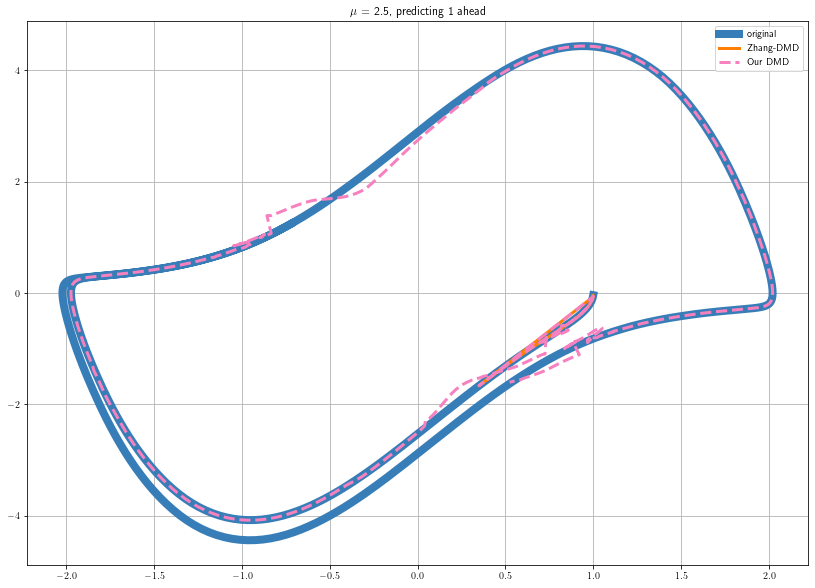

In [303]:
w = 100 #toliko uzmem za pocetak
q=w
unaprijed=1
#########################################################

kraj=m-1000
times_init=[i for i in range(w+unaprijed)]; times=[unaprijed]
"""
wdmd = WindowDMD(n, w)
wdmd.initialize(vdp[:,:w], vdp[:,1:w+1]) # this is necessary for window DMD
start = time.time()
for k in range(w, kraj-1):
    wdmd.update(vdp[:, k], vdp[:, k+1])
    Lambda_w, Z_w = wdmd.computemodes()
    if k==w:
        reconstructed_njihovo_w = DMD_reconstruction(vdp[:,:w], Z_w, 'all', Lambda_w, times_init)
    else:
        reconstructed_njihovo_w = np.append(reconstructed_njihovo_w,DMD_reconstruction(vdp[:,k-w+1:k+1], Z_w, 'all', Lambda_w, times), axis=1)
end = time.time()
Lambda_w, Z_w = wdmd.computemodes()

print(Lambda_w,)

print("Window DMD, weighting = 1, time = " + str(end-start) + " secs")"""

Z_nas_w, Lambda_nas_w, r, Q, L = fGEDMDQ_multiple_trajectories(vdp[:,:w], vdp[:,1:w+1])
start_nas = time.time()
for k in range(w, kraj-1):
    _,_,_, Q, L = fDMD_discarding_snap(Q, L, 1)

    ##### quick-fix za ortogonalnost
    """if((k-w)%50 == 0 and k>w):
        print("reortg")
        Q, R_q = np.linalg.qr(Q)
        R_q = R_q@L.T; L = R_q.T
    print(np.allclose(Q.T@Q, np.eye(Q.shape[1])))"""
    
    Z_nas_w, Lambda_nas_w, r, Q, L = fDMD_added_snap(np.bmat([vdp[:,k],vdp[:,k+1]]).T, Q, L)
    print(Lambda_nas_w)
    if k==w:
        reconstructed_nas_w = DMD_reconstruction(vdp[:,:w], Z_nas_w, 'all', Lambda_nas_w, times_init)
    else:
        reconstructed_nas_w = np.append(reconstructed_nas_w,DMD_reconstruction(vdp[:,k-w+1:k+1], Z_nas_w, 'all', Lambda_nas_w, times), axis=1)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

kraj=m-300
plt.figure(figsize=(14, 10))


CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
"""
plt.plot(vdp[-2,100:850], vdp[-1,100:850],lw=8, label=f"original", color=CB_color_cycle[0])
plt.plot(predicted_H[-2,:], predicted_H[-1,:], lw=3, label=f"Hemati-DMD prediction", color=CB_color_cycle[1])
#plt.plot(predicted[-2,:400], predicted[-1,:400], label=f"predicted - ours", color=CB_color_cycle[8],  linestyle='dashed')
plt.plot(predicted_thresh[-2,:], predicted_thresh[-1,:], label=f"our prediction", lw=3, color = CB_color_cycle[3], linestyle='dashed')

    
"""

kraj=m-700
plt.rcParams['text.usetex']=True
plt.plot(vdp[-2,:kraj], vdp[-1,:kraj], color=CB_color_cycle[0], lw=8, label=f"original")
plt.plot(reconstructed_njihovo_w[-2,:kraj], reconstructed_njihovo_w[-1,:kraj], color=CB_color_cycle[1], lw=3, label=f"Zhang-DMD")
plt.plot(reconstructed_nas_w[-2,:kraj], reconstructed_nas_w[-1,:kraj], color=CB_color_cycle[3], linestyle = 'dashed', lw=3, label=f"Our DMD")
plt.grid()
plt.legend(loc='upper right')
plt.title('$\mu$ = {}, predicting {} ahead'.format(mu, unaprijed))

#za 5 opet super u oba slucaja, i za 10, za 20 malo curi ali i dalje dobro
